In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Redefining the negative-positive class

## Some data viz

In [3]:
# Read in supp table 4 (or 3, the cox_hr table
supp_cox_hr = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/nature_proteomics_papers/blood_protein_assessment_of_leading_incident_diseases_and_mortality_in_the_UK_Biobank/supp_table_4.tsv", sep="\t")
supp_cox_hr['P.Value'] = supp_cox_hr['P.Value'].str.replace(',', '.').astype(float)
supp_cox_hr['HR'] = supp_cox_hr['HR'].str.replace(',', '.').astype(float)
supp_cox_hr['UCI'] = supp_cox_hr['UCI'].str.replace(',', '.').astype(float)
supp_cox_hr['LCI'] = supp_cox_hr['LCI'].str.replace(',', '.').astype(float)

supp_cox_hr.to_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/nature_proteomics_papers/blood_protein_assessment_of_leading_incident_diseases_and_mortality_in_the_UK_Biobank/supp_table_4_tmp.tsv", sep="\t")
len(supp_cox_hr["Outcome"].unique())

# Extract all AD genes in table 4
#supp_cox_hr["gene"] = supp_cox_hr["Predictor"].apply(lambda x: x.split(".")[0] + "." + x.split(".")[-2])
#supp_cox_hr["-logp"] = -np.log(supp_cox_hr["P.Value"] + 1e-60)
#
#supp_cox_hr = supp_cox_hr[supp_cox_hr["Outcome"] == "Alzheimer's dementia"].drop_duplicates(subset=["gene"])
#supp_cox_hr.head()

24

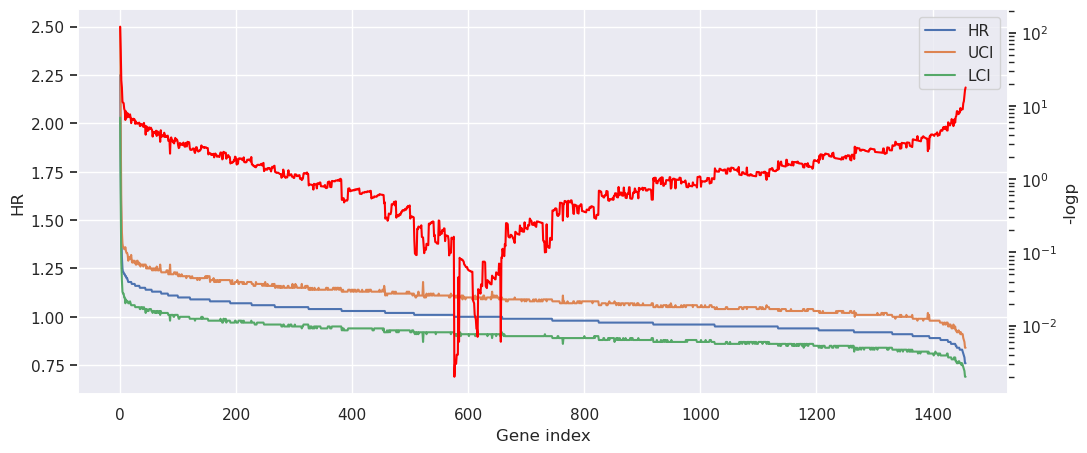

In [30]:
supp_cox_hr_hr_sorted = supp_cox_hr.sort_values(by="HR", ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 5))

ax2 = ax1.twinx()
ax2.grid(False)

ax1.plot(supp_cox_hr_hr_sorted["HR"].tolist(), label="HR")
ax1.plot(supp_cox_hr_hr_sorted["UCI"].tolist(), label="UCI")
ax1.plot(supp_cox_hr_hr_sorted["LCI"].tolist(), label="LCI")
ax2.plot(supp_cox_hr_hr_sorted["-logp"].tolist(), color="red")
ax2.set_ylabel("-logp")
ax1.set_xlabel("Gene index")
ax1.set_ylabel("HR")
ax1.legend()
ax2.set_yscale("log")
plt.show()

## Change Bonferroni correction quotient

In [56]:
# Only adjusted for the number of diseases
pval_thres = 0.05
quot = 24
adj_pval = pval_thres / quot

supp_cox_hr["positive"] = supp_cox_hr["P.Value"] < adj_pval
print(f"Number of positives: {supp_cox_hr[supp_cox_hr['positive']].shape[0]}")
print(f"Number of negatives: {supp_cox_hr.shape[0] - supp_cox_hr[supp_cox_hr['positive']].shape[0]}")

Number of positives: 47
Number of negatives: 1421


In [3]:
# pval-adjusted and CI not containing 1.0
pval_thres = 0.05
quot = 24
adj_pval = pval_thres / quot
supp_cox_hr["positive"] = ~((supp_cox_hr["LCI"] < 1.0) & (supp_cox_hr["UCI"] > 1.0) & (supp_cox_hr["P.Value"] > adj_pval))

print(f"Number of positives: {supp_cox_hr[supp_cox_hr['positive']].shape[0]}")
print(f"Number of negatives: {supp_cox_hr.shape[0] - supp_cox_hr[supp_cox_hr['positive']].shape[0]}")

supp_cox_hr_neg_genes = supp_cox_hr[~(supp_cox_hr["positive"])]["gene"].tolist()
supp_cox_hr_genes = supp_cox_hr["gene"].tolist()

Number of positives: 241
Number of negatives: 1227


In [58]:
# No pval adjustment
pval_thres = 0.05
quot = 24
adj_pval = pval_thres

supp_cox_hr["positive"] = supp_cox_hr["P.Value"] < adj_pval
print(f"Number of positives: {supp_cox_hr[supp_cox_hr['positive']].shape[0]}")
print(f"Number of negatives: {supp_cox_hr.shape[0] - supp_cox_hr[supp_cox_hr['positive']].shape[0]}")

Number of positives: 217
Number of negatives: 1251


In [70]:
# Very large pval
pval_thres = 0.3
quot = 24
adj_pval = pval_thres

supp_cox_hr["positive"] = supp_cox_hr["P.Value"] < adj_pval
print(f"Number of positives: {supp_cox_hr[supp_cox_hr['positive']].shape[0]}")
print(f"Number of negatives: {supp_cox_hr.shape[0] - supp_cox_hr[supp_cox_hr['positive']].shape[0]}")

supp_cox_hr_neg_genes = supp_cox_hr[~(supp_cox_hr["positive"])]["gene"].tolist()
supp_cox_hr_genes = supp_cox_hr["gene"].tolist()

Number of positives: 680
Number of negatives: 788


In [59]:
# Only CI not containing 1.0
supp_cox_hr_neg = supp_cox_hr[(supp_cox_hr["LCI"] < 1.0) & (supp_cox_hr["UCI"] > 1.0)]
print(f"Number of negatives: {supp_cox_hr_neg.shape[0]}")
print(f"Number of positives: {supp_cox_hr.shape[0] - supp_cox_hr_neg.shape[0]}")

Number of negatives: 1227
Number of positives: 241


In [60]:
# FDR
pval_thres = 0.05

from scipy import stats
supp_cox_hr["FDR"] = stats.false_discovery_control(supp_cox_hr["P.Value"])
supp_cox_hr["positive"] = supp_cox_hr["FDR"] < pval_thres

print(f"Number of positives: {supp_cox_hr[supp_cox_hr['positive']].shape[0]}")
print(f"Number of negatives: {supp_cox_hr.shape[0] - supp_cox_hr[supp_cox_hr['positive']].shape[0]}")

supp_cox_hr_neg_genes = supp_cox_hr[~(supp_cox_hr["positive"])]["gene"].tolist()
supp_cox_hr_genes = supp_cox_hr["gene"].tolist()

Number of positives: 40
Number of negatives: 1428


In [66]:
# FDR and CI not containing 1.0
pval_thres = 0.05

from scipy import stats
supp_cox_hr["FDR"] = stats.false_discovery_control(supp_cox_hr["P.Value"])
supp_cox_hr_neg = supp_cox_hr[(supp_cox_hr["LCI"] < 1.0) & (supp_cox_hr["UCI"] > 1.0) & (supp_cox_hr["FDR"] > pval_thres)]
print(f"Number of negatives: {supp_cox_hr_neg.shape[0]}")
print(f"Number of positives: {supp_cox_hr.shape[0] - supp_cox_hr_neg.shape[0]}")

supp_cox_hr_neg_genes = supp_cox_hr_neg["gene"].tolist()
supp_cox_hr_genes = supp_cox_hr["gene"].tolist()

Number of negatives: 1227
Number of positives: 241


In [6]:
# CI being pushed even further from 1.0
pval_thres = 0.05
lci_thres = 0.975
uci_thres = 1.025

from scipy import stats
supp_cox_hr["FDR"] = stats.false_discovery_control(supp_cox_hr["P.Value"])
supp_cox_hr_neg = supp_cox_hr[(supp_cox_hr["LCI"] < lci_thres) & (supp_cox_hr["UCI"] > uci_thres) & (supp_cox_hr["FDR"] > pval_thres)]
print(f"Number of negatives: {supp_cox_hr_neg.shape[0]}")
print(f"Number of positives: {supp_cox_hr.shape[0] - supp_cox_hr_neg.shape[0]}")

supp_cox_hr_neg_genes = supp_cox_hr_neg["gene"].tolist()
supp_cox_hr_genes = supp_cox_hr["gene"].tolist()

Number of negatives: 1032
Number of positives: 436


## Choose the most negative genes to pair with the most positive

In [4]:
# Positive genes: Only CI not containing 1.0
supp_cox_hr_pos = supp_cox_hr[(supp_cox_hr["LCI"] > 1.0) | (supp_cox_hr["UCI"] < 1.0)]
supp_cox_hr_pos_genes = supp_cox_hr_pos["gene"].tolist()

# Most negative genes based on largest p-value
supp_cox_hr_neg = supp_cox_hr.sort_values(by="P.Value", ascending=False).head(supp_cox_hr_pos.shape[0])
supp_cox_hr_neg_genes = supp_cox_hr_neg["gene"].tolist()

supp_cox_hr_genes = supp_cox_hr_pos_genes
supp_cox_hr_genes.extend(supp_cox_hr_neg_genes)

In [8]:
# Positive genes: FDR
from scipy import stats

brain_piehl_genes = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/piehl_2022_gazestani_2023_integrative/results/data/cell_type_specificity/seurat_funcs/markers_wilcox_nomax_brain_general_cell_types.tsv", sep="\t")["gene"].unique().tolist()
pval_thres = 0.05
supp_cox_hr["FDR"] = stats.false_discovery_control(supp_cox_hr["P.Value"])

# Get only genes in single-cell
supp_cox_hr["gene_name"] = supp_cox_hr["gene"].apply(lambda x: x.split(".")[0])
supp_cox_hr_sub = supp_cox_hr[supp_cox_hr["gene_name"].isin(brain_piehl_genes)]
supp_cox_hr_pos = supp_cox_hr_sub[supp_cox_hr_sub["FDR"] < pval_thres]
supp_cox_hr_pos_genes = supp_cox_hr_pos["gene"].tolist()

# Most negative genes based on largest p-value
supp_cox_hr_neg = supp_cox_hr_sub.sort_values(by="P.Value", ascending=False).head(supp_cox_hr_pos.shape[0])
supp_cox_hr_neg_genes = supp_cox_hr_neg["gene"].tolist()

supp_cox_hr_genes = supp_cox_hr_pos_genes
supp_cox_hr_genes.extend(supp_cox_hr_neg_genes)

# Train ElasticNet on only 7 brain cell types

## Input data

In [5]:
print(f"Number of negatives: {len(supp_cox_hr_neg_genes)}")
print(f"All genes: {len(supp_cox_hr_genes)}")

Number of negatives: 188
All genes: 376


### Using seismic's cell type specificity score

### Seurat's FindAllMarkers cell type specificity

In [12]:
### Preprocess 
brain_piehl_sscore = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/piehl_2022_gazestani_2023_integrative/results/data/cell_type_specificity/seurat_funcs/markers_wilcox_nomax_brain_general_cell_types.tsv", sep="\t")
brain_piehl_sscore = brain_piehl_sscore[["avg_log2FC", "cluster", "gene"]]
brain_piehl_sscore = pd.pivot_table(brain_piehl_sscore, columns=["cluster"], index=["gene"], values="avg_log2FC").fillna(0.0)

sig_genes = [0 if g in list(supp_cox_hr_neg_genes) else 1 for g in supp_cox_hr_genes]
sig_genes_df = pd.DataFrame(sig_genes, index=list(supp_cox_hr_genes), columns=["predictive"]).reset_index()
sig_genes_df["gene"] = sig_genes_df["index"].apply(lambda x: x.split(".")[0])
sig_genes_df = sig_genes_df.drop(columns="index").drop_duplicates(subset="gene", keep="first").set_index("gene")

sscore_sig = pd.merge(brain_piehl_sscore, sig_genes_df, left_index=True, right_index=True)
X = sscore_sig.drop(columns=["predictive"])
y = sscore_sig["predictive"].to_frame()
cell_type_names = sscore_sig.columns.tolist()[:-1]
print(X.shape)
print(f"Number positive: {y.sum().item()}")
print(f"Number negative: {X.shape[0] - y.sum().item()}")

(265, 7)
Number positive: 131
Number negative: 134


In [80]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler_X = StandardScaler()
X_train_np = scaler_X.fit_transform(X_train)
X_test_np = scaler_X.transform(X_test)

## Train Logistic Regression with GridSearchCV

In [63]:
neg_pos_ratio = int((y_train.shape[0] - y_train.sum().item()) / (y_train.sum().item()))
print(neg_pos_ratio)

5


In [68]:
# Calculate the weights
pos_weights = 1
y_train_weights = np.ones_like(y_train)
y_train_weights[y_train == 1] = pos_weights
y_train_weights[y_train == 0] = 1
y_train_weights = np.squeeze(y_train_weights)

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

y_train_np = np.squeeze(y_train.to_numpy())
y_test_np = np.squeeze(y_test.to_numpy())

model = LogisticRegression(penalty='elasticnet', class_weight={0: 1, 1: pos_weights}, solver="saga", max_iter=1000, l1_ratio=0.1, C=1.0)

param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
    "class_weight": [{0: 1.0, 1: 3}, {0: 1.0, 1: 4}, {0: 1.0, 1: 10}]
}
grid_search = GridSearchCV(model, param_grid, scoring='average_precision', cv=5)

#grid_search.fit(X_train_np, y_train_np, **{"sample_weight": y_train_weights})
grid_search.fit(X_train_np, y_train_np)

y_score = grid_search.predict_proba(X_test_np)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_np, y_score)
auc_precision_recall = auc(recall, precision)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best model's PR AUC on test set: {auc_precision_recall:.4f}")

Best parameters found: {'C': 0.01, 'class_weight': {0: 1.0, 1: 3}, 'l1_ratio': 0.1}
Best model's PR AUC on test set: 0.0281


In [88]:
## Grab best model
model = grid_search.best_estimator_

y_pred = model.predict(X_test_np)
y_score = model.predict_proba(X_test_np)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_np, y_score)
auc_precision_recall = auc(recall, precision)

print(auc_precision_recall)
print(confusion_matrix(y_test_np, y_pred))
print(classification_report(y_test_np, y_pred))

0.028136964175198058
[[207   0]
 [  6   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       207
           1       0.00      0.00      0.00         6

    accuracy                           0.97       213
   macro avg       0.49      0.50      0.49       213
weighted avg       0.94      0.97      0.96       213



/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/conda_env/test-env/envs/scanpy-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/conda_env/test-env/envs/scanpy-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/conda_env/test-env/envs/scanpy-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: Undefin

## Performance distribution across hyperparams and data folds, ElasticNet

In [13]:
# Calculate the weights
pos_weights = [1.0]
Cs = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.8, 0.9]
auprc_df = []
coeff_df = []
N = 5

#
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

kfold = StratifiedKFold(n_splits=N, shuffle=True, random_state=42)
for i, (train_ind, test_ind) in enumerate(kfold.split(X, y)):

    print(f"Working on fold {i}")
    X_train, y_train = X.iloc[train_ind, :], y.iloc[train_ind, :]
    X_test, y_test = X.iloc[test_ind, :], y.iloc[test_ind, :]
    scaler_X = StandardScaler()
    X_train_np = scaler_X.fit_transform(X_train)
    X_test_np = scaler_X.transform(X_test)
    
    for p in pos_weights:
        for C in Cs:
            for l1_ratio in l1_ratios:
    
                y_train_weights = np.ones_like(y_train)
                y_train_weights[y_train == 1] = p
                y_train_weights[y_train == 0] = 1
                y_train_weights = np.squeeze(y_train_weights)
                
                y_train_np = np.squeeze(y_train.to_numpy())
                y_test_np = np.squeeze(y_test.to_numpy())

                model = LogisticRegression(penalty='elasticnet', class_weight={0: 1, 1: p}, solver="saga", max_iter=10000, l1_ratio=l1_ratio, C=C)        
                try:
                    with warnings.catch_warnings():
                        warnings.filterwarnings("error", category=ConvergenceWarning)
                        model.fit(X_train_np, y_train_np, sample_weight=y_train_weights)
                except ConvergenceWarning:
                    print(f"Model at fold={i}, pos_weights={p}, C={C}, and l1_ratio={l1_ratio}")
                    del model
                    continue
        
                y_pred = model.predict(X_test_np)
                y_score = model.predict_proba(X_test_np)[:, 1]
                precision, recall, thresholds = precision_recall_curve(y_test_np, y_score)
                auc_precision_recall = auc(recall, precision)
                conf_mat = confusion_matrix(y_test_np, y_pred)
                auprc_df.append([i, p, C, l1_ratio, auc_precision_recall, conf_mat[0, 0], conf_mat[0, 1], conf_mat[1, 0], conf_mat[1, 1]])
    
                l = [i, p, C, l1_ratio]
                l.extend(np.squeeze(model.coef_).tolist())
                coeff_df.append(l)
        
                del model

auprc_df = pd.DataFrame(auprc_df, columns=["fold", "pos_weights", "C", "l1_ratio", "AUPRC", "TN", "FN", "FP", "TP"])
coeff_cols = ["fold", "pos_weights", "C", "l1_ratio"]
coeff_cols.extend(cell_type_names)
coeff_df = pd.DataFrame(coeff_df, columns=coeff_cols)

Working on fold 0
Working on fold 1
Working on fold 2
Working on fold 3
Working on fold 4


In [14]:
# Since AUPRC calculations for FN=0 and TP=0 and vice versa is not reliable, discard those
auprc_df_good = auprc_df[(~((auprc_df["FN"] == 0) & (auprc_df["TP"] == 0))) & (~((auprc_df["TN"] == 0) & (auprc_df["FP"] == 0)))]
auprc_df_good["id"] = auprc_df_good["fold"].astype(str) + "-" + auprc_df_good["pos_weights"].astype(str) + "-" + auprc_df_good["C"].astype(str) + "-" + auprc_df_good["l1_ratio"].astype(str)

coeff_df["id"] = coeff_df["fold"].astype(str) + "-" + coeff_df["pos_weights"].astype(str) + "-" + coeff_df["C"].astype(str) + "-" + coeff_df["l1_ratio"].astype(str)
coeff_df_good = coeff_df[(coeff_df["id"].isin(auprc_df_good["id"].tolist()))]

print(f"Before removing bad samples = {auprc_df.shape[0]}")
print(f"After removing bad samples = {auprc_df_good.shape[0]}")

Before removing bad samples = 120
After removing bad samples = 94


/tmp/ipykernel_9212/2927181941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auprc_df_good["id"] = auprc_df_good["fold"].astype(str) + "-" + auprc_df_good["pos_weights"].astype(str) + "-" + auprc_df_good["C"].astype(str) + "-" + auprc_df_good["l1_ratio"].astype(str)


In [26]:
# lci<1_uci>1_most_neg, fdr_0.05_most_neg
base_path = "/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/piehl_2022_gazestani_2023_integrative/results/data/seismic_uk_biobank_ppp_bin_new"
unique_name = "fdr_0.05_most_neg"

auprc_df_good = pd.read_csv(f"{base_path}/auprc_{unique_name}.tsv", sep="\t")
coeff_df_good = pd.read_csv(f"{base_path}/coeff_{unique_name}.tsv", sep="\t")

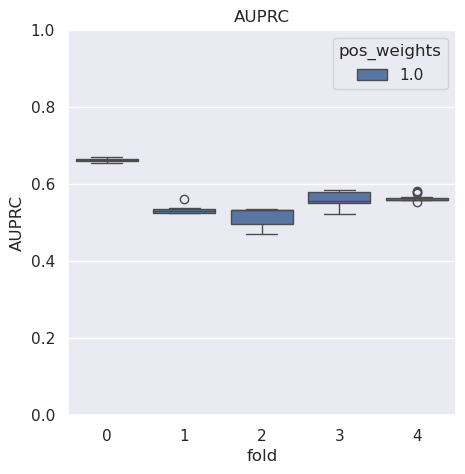

In [22]:
plt.figure(figsize=(5, 5))
sns.boxplot(auprc_df_good, x="fold", y="AUPRC", hue="pos_weights")
plt.ylim([0.0, 1.0])
plt.title("AUPRC")
plt.show()

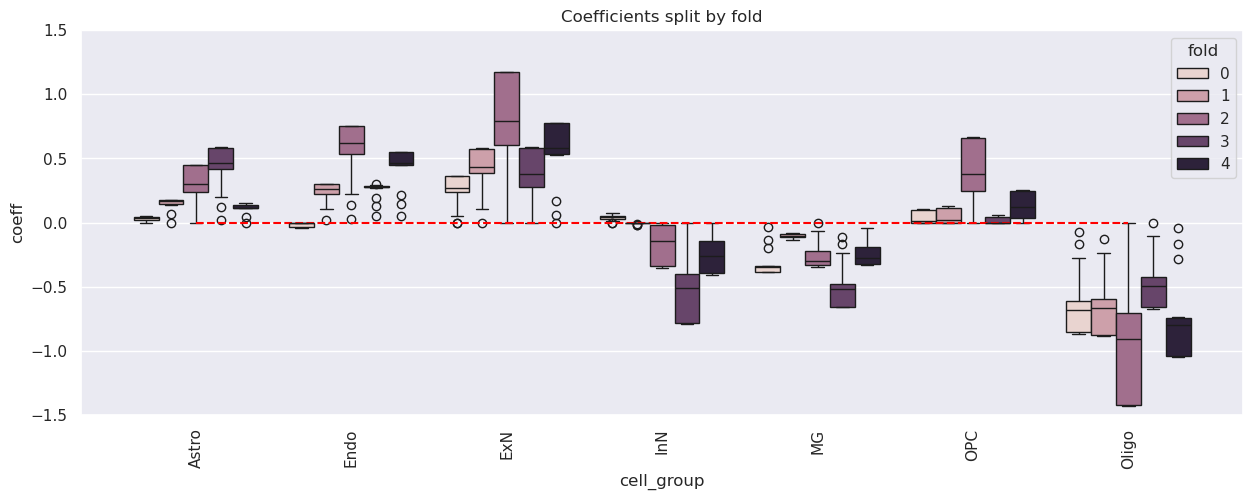

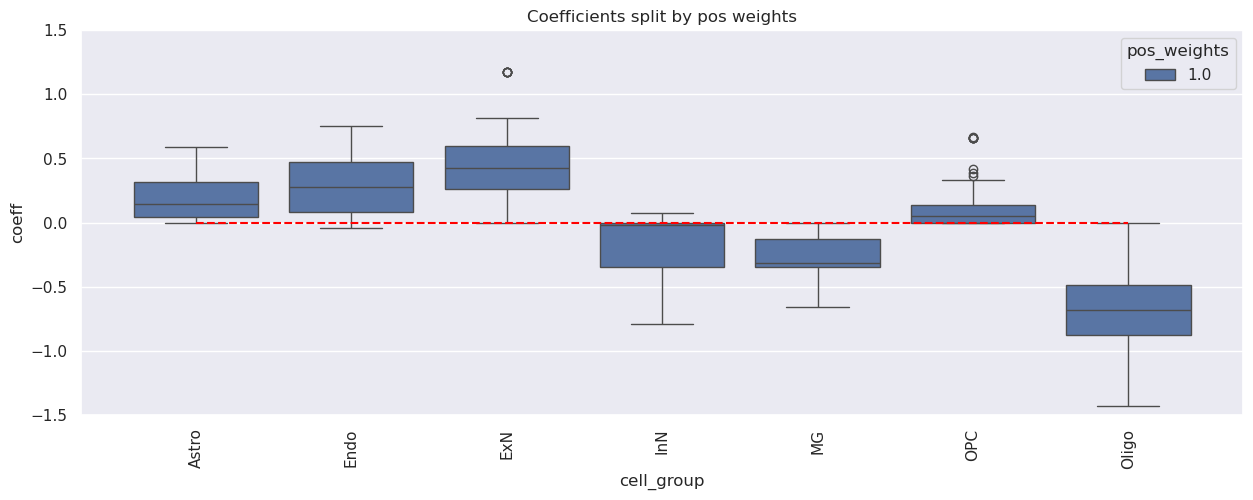

In [27]:
coeff_dfd = coeff_df_good.drop(columns=["C", "l1_ratio", "pos_weights", "id"])
coeff_dfm = pd.melt(coeff_dfd, id_vars=["fold"]).rename(columns={"variable": "cell_group", "value": "coeff"})
plt.figure(figsize=(15, 5))
sns.boxplot(coeff_dfm, x="cell_group", y="coeff", hue="fold")
plt.plot([0]*7, color="red", linestyle="dashed")
plt.xticks(rotation=90)
plt.ylim([-1.5, 1.5])
plt.title("Coefficients split by fold")
plt.show()


coeff_dfd = coeff_df_good.drop(columns=["C", "l1_ratio", "fold", "id"])
coeff_dfm = pd.melt(coeff_dfd, id_vars=["pos_weights"]).rename(columns={"variable": "cell_group", "value": "coeff"})
plt.figure(figsize=(15, 5))
sns.boxplot(coeff_dfm, x="cell_group", y="coeff", hue="pos_weights")
plt.plot([0]*7, color="red", linestyle="dashed")
plt.xticks(rotation=90)
plt.ylim([-1.5, 1.5])
plt.title("Coefficients split by pos weights")
plt.show()

In [17]:
base_path = "/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/piehl_2022_gazestani_2023_integrative/results/data/seismic_uk_biobank_ppp_bin_new"
unique_name = "lci<1_uci>1_most_neg"

auprc_df_good.to_csv(f"{base_path}/auprc_{unique_name}.tsv", sep="\t", index=False)
coeff_df_good.to_csv(f"{base_path}/coeff_{unique_name}.tsv", sep="\t", index=False)